# PANDAS

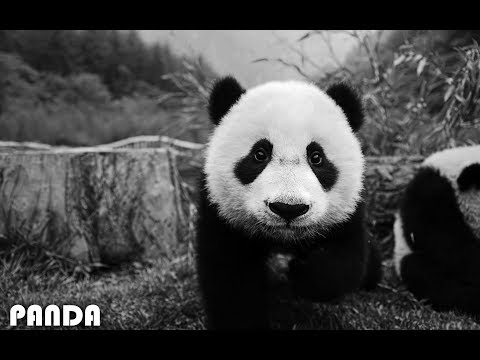

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('5vZU8nmoAAs', width=640, height=480)

## Introducing pandas while analysing experimental data.

The experiments were run on several mathematical models and the output data is organized as follows:
- main folder contains data in subfolders for specified experimental parameters settings
- every subfolder contains 10 result folders for single experiment 
- every result folder for single experiment contains 5 files (Solution0.csv, Solution1.csv, ...)

### Loading the data from csv

imports

In [2]:
import pandas as pd
import os

read_csv(path)

In [3]:
path = os.path.join(os.getcwd(),'SIM/test_05_5_1/01/',"Solution0.csv")
df = pd.read_csv(path)

show whole table (DataFrame)

In [4]:
df

Unnamed: 0 Model  Num Gene   Time  TimeIP  Objective Function  \
0           0   IP0        11  0.796   0.185                 3.0   

   Num Duplication  Num Loss  Num Coal at Spe  Num Coal at Dup  
0              1.0       0.0              2.0              0.0

get data from one column

In [5]:
df['Model']

0    IP0
Name: Model, dtype: object

series of data - Series

In [6]:
type(df['Model'])

pandas.core.series.Series

**Add a column**

In [7]:
df['Exp id'] = 0
df

Unnamed: 0 Model  Num Gene   Time  TimeIP  Objective Function  \
0           0   IP0        11  0.796   0.185                 3.0   

   Num Duplication  Num Loss  Num Coal at Spe  Num Coal at Dup  Exp id  
0              1.0       0.0              2.0              0.0       0

**Remove a column / selection of columns**

In [8]:
da = df[['Model', 'Time', 'Objective Function']]
da

Model   Time  Objective Function
0   IP0  0.796                 3.0

In [9]:
db = df.loc[:,'Model':'Objective Function'] # row,columns + slicing
db

Model  Num Gene   Time  TimeIP  Objective Function
0   IP0        11  0.796   0.185                 3.0

In [10]:
dc = df.iloc[:,2:5] # row,columns + slicing
dc

Num Gene   Time  TimeIP
0        11  0.796   0.185

All files have the same format we want to combine them

In [11]:
path = os.path.join(os.getcwd(),'SIM/test_05_5_1/02/',"Solution0.csv") #same model in different experiment folder
df = pd.read_csv(path)
df

Unnamed: 0 Model  Num Gene   Time  TimeIP  Objective Function  \
0           0   IP0         3  0.128   0.029                 1.0   

   Num Duplication  Num Loss  Num Coal at Spe  Num Coal at Dup  
0              0.0       1.0              0.0              0.0

In [12]:
path = os.path.join(os.getcwd(),'SIM/test_05_5_1/02/',"Solution1.csv") #same experiment, different model
df = pd.read_csv(path)
df

Unnamed: 0 Model  Num Gene   Time  TimeIP  Objective Function  \
0           0   IP1         3  0.026   0.001                 1.0   

   Num Duplication  Num Loss  Num Coal at Spe  Num Coal at Dup  
0              0.0       1.0              0.0                0

**concat DataFrames**

In [ ]:
# pd.concat(dflist, axis=0, ignore_index=True)

# Exercise 1

Download all experimental data in one DataFrame. 

Add 'Exp id' column to number all experiments (5 model results from one subfolder)

In [3]:
models = 5
path = os.path.join(os.getcwd(),'SIM')
list1=os.listdir(path)
excount = 0
dflist=[]

for dir1 in list1:
    list2=os.listdir(os.path.join(path,dir1))

    exlist = []
    for dir2 in list2:
        data = []

        for i in range(models):
            temp = pd.read_csv(os.path.join(path,dir1,dir2,"Solution"+str(i)+".csv"))
            data.append(temp)

        if not data==[]:
            ex = pd.concat(data, axis=0, ignore_index=True) # dataframe for one exp
            ex['Exp id'] = excount
            excount += 1
            exlist.append(ex)
            if "_05_" in dir1:
                ex['Species no'] = 5
            if "_10_" in dir1:
                ex['Species no'] = 10
            if "_15_" in dir1:
                ex['Species no'] = 15
            if "_20_" in dir1:
                ex['Species no'] = 20
            if "_25_" in dir1:
                ex['Species no'] = 25
            if "_30_" in dir1:
                ex['Species no'] = 30
            if "_35_" in dir1:
                ex['Species no'] = 35
            if "_40_" in dir1:
                ex['Species no'] = 40
            if "_45_" in dir1:
                ex['Species no'] = 45
            if "_50_" in dir1:
                ex['Species no'] = 50
            
        
    if not exlist==[]:
        df = pd.concat(exlist, axis=0, ignore_index=True) # dataframe for all experiment with the same simulation settings
        dflist.append(df)

dd = pd.concat(dflist, axis=0, ignore_index=True)  #total dataframe
dd

Unnamed: 0 Model  Num Gene     Time  TimeIP  Objective Function  \
0             0   IP0        46   31.948   1.634                 7.0   
1             0   IP1        46    0.929   0.006                 7.0   
2             0   IP2        46    0.923   0.006                 7.0   
3             0   IP3        46   31.554   1.653                 7.0   
4             0   IP4        46    0.958   0.006                 7.0   
5             0   IP0        45   32.972   2.054                10.0   
6             0   IP1        45    1.285   0.008                10.0   
7             0   IP2        45    1.394   0.008                10.0   
8             0   IP3        45   33.104   2.085                10.0   
9             0   IP4        45    1.329   0.008                10.0   
10            0   IP0        48   44.418   2.418                13.0   
11            0   IP1        48    0.810   0.005                13.0   
12            0   IP2        48    0.780   0.005                13.0   
13            0   IP3        48   45.254   2.368                13.0   
14            0   IP4        48    0.832   0.006                13.0   
15            0   IP0        42   25.956   1.001                 3.0   
16            0   IP1        42    0.336   0.002                 3.0   
17            0   IP2        42    0.340   0.002                 3.0   
18            0   IP3        42   25.540   1.009                 3.0   
19            0   IP4        42    0.363   0.002                 3.0   
20            0   IP0        66   70.035   5.277                13.0   
21            0   IP1        66    1.356   0.017                13.0   
22            0   IP2        66    1.338   0.016                13.0   
23            0   IP3        66   71.477   5.131                13.0   
24            0   IP4        66    1.353   0.015                13.0   
25            0   IP0        86  131.949  13.908                27.0   
26            0   IP1        86    5.700   0.122                27.0   
27            0   IP2        86    5.626   0.108                31.0   
28            0   IP3        86  127.570  12.547                27.0   
29            0   IP4        86    5.709   0.132                27.0   
..          ...   ...       ...      ...     ...                 ...   
470           0   IP0         2    0.122   0.003                 1.0   
471           0   IP1         2    0.071   0.001                 1.0   
472           0   IP2         2    0.072   0.001                 1.0   
473           0   IP3         2    0.118   0.002                 1.0   
474           0   IP4         2    0.074   0.001                 1.0   
475           0   IP0        23    5.677   0.325                 2.0   
476           0   IP1        23    0.145   0.001                 2.0   
477           0   IP2        23    0.145   0.001                 2.0   
478           0   IP3        23    5.588   0.327                 2.0   
479           0   IP4        23    0.204   0.002                 2.0   
480           0   IP0        20    7.777   0.574                 6.0   
481           0   IP1        20    0.383   0.003                 6.0   
482           0   IP2        20    0.325   0.003                 6.0   
483           0   IP3        20    8.091   0.815                 6.0   
484           0   IP4        20    0.342   0.003                 6.0   
485           0   IP0        13    3.105   0.107                 2.0   
486           0   IP1        13    0.128   0.001                 2.0   
487           0   IP2        13    0.129   0.001                 2.0   
488           0   IP3        13    3.059   0.112                 2.0   
489           0   IP4        13    0.149   0.001                 2.0   
490           0   IP0        31    8.642   0.695                 6.0   
491           0   IP1        31    0.757   0.013                 6.0   
492           0   IP2        31    0.743   0.011                 6.0   
493           0   IP3        31    8.743   0.

## Procesing the data in DataFrames

In [17]:
dd.head(7)

Unnamed: 0 Model  Num Gene    Time  TimeIP  Objective Function  \
0           0   IP0        46  31.948   1.634                 7.0   
1           0   IP1        46   0.929   0.006                 7.0   
2           0   IP2        46   0.923   0.006                 7.0   
3           0   IP3        46  31.554   1.653                 7.0   
4           0   IP4        46   0.958   0.006                 7.0   
5           0   IP0        45  32.972   2.054                10.0   
6           0   IP1        45   1.285   0.008                10.0   

   Num Duplication  Num Loss  Num Coal at Spe  Num Coal at Dup  Exp id  \
0              2.0       2.0              3.0              0.0       0   
1              2.0       2.0              3.0              0.0       0   
2              2.0       2.0              3.0              0.0       0   
3              2.0       2.0              3.0              0.0       0   
4              2.0       2.0              3.0              0.0       0   
5              3.0       3.0              4.0              0.0       1   
6              3.0       4.0              3.0              0.0       1   

   Species no  
0          45  
1          45  
2          45  
3          45  
4          45  
5          45  
6          45

**Selecting values with parameter**

In [20]:
da = dd[dd.Time > 30]
da.head()

Unnamed: 0 Model  Num Gene    Time  TimeIP  Objective Function  \
0            0   IP0        46  31.948   1.634                 7.0   
3            0   IP3        46  31.554   1.653                 7.0   
5            0   IP0        45  32.972   2.054                10.0   
8            0   IP3        45  33.104   2.085                10.0   
10           0   IP0        48  44.418   2.418                13.0   

    Num Duplication  Num Loss  Num Coal at Spe  Num Coal at Dup  Exp id  \
0               2.0       2.0              3.0              0.0       0   
3               2.0       2.0              3.0              0.0       0   
5               3.0       3.0              4.0              0.0       1   
8               3.0       3.0              4.0              0.0       1   
10              1.0       5.0              7.0              0.0       2   

    Species no  
0           45  
3           45  
5           45  
8           45  
10          45

In [24]:
mymask = (dd.Time > 30) & (dd.TimeIP < 2)
mymask.head(7)

0     True
1    False
2    False
3     True
4    False
5    False
6    False
dtype: bool

In [22]:
da = dd[mymask]
da

Unnamed: 0 Model  Num Gene    Time  TimeIP  Objective Function  \
0            0   IP0        46  31.948   1.634                 7.0   
3            0   IP3        46  31.554   1.653                 7.0   
30           0   IP0        43  32.340   1.674                12.0   
33           0   IP3        43  32.252   1.672                12.0   
50           0   IP0        45  52.048   1.625                11.0   
53           0   IP3        45  52.612   1.638                11.0   

    Num Duplication  Num Loss  Num Coal at Spe  Num Coal at Dup  Exp id  \
0               2.0       2.0              3.0              0.0       0   
3               2.0       2.0              3.0              0.0       0   
30              4.0       5.0              3.0              0.0       6   
33              4.0       5.0              3.0              0.0       6   
50              3.0       2.0              6.0              0.0      10   
53              3.0       2.0              6.0              0.0      10   

    Species no  
0           45  
3           45  
30          45  
33          45  
50          50  
53          50

Negation of a mask

In [25]:
da = dd[~mymask]
da.head()

Unnamed: 0 Model  Num Gene    Time  TimeIP  Objective Function  \
1           0   IP1        46   0.929   0.006                 7.0   
2           0   IP2        46   0.923   0.006                 7.0   
4           0   IP4        46   0.958   0.006                 7.0   
5           0   IP0        45  32.972   2.054                10.0   
6           0   IP1        45   1.285   0.008                10.0   

   Num Duplication  Num Loss  Num Coal at Spe  Num Coal at Dup  Exp id  \
1              2.0       2.0              3.0              0.0       0   
2              2.0       2.0              3.0              0.0       0   
4              2.0       2.0              3.0              0.0       0   
5              3.0       3.0              4.0              0.0       1   
6              3.0       4.0              3.0              0.0       1   

   Species no  
1          45  
2          45  
4          45  
5          45  
6          45

**isin()** command

In [26]:
a = ['2.0']
da = dd[dd['Objective Function'].isin(a)]
da

Unnamed: 0 Model  Num Gene   Time  TimeIP  Objective Function  \
260           0   IP0         7  0.262   0.056                 2.0   
261           0   IP1         7  0.044   0.001                 2.0   
262           0   IP2         7  0.044   0.001                 2.0   
263           0   IP3         7  0.269   0.059                 2.0   
264           0   IP4         7  0.046   0.001                 2.0   
285           0   IP0         4  0.166   0.033                 2.0   
286           0   IP1         4  0.029   0.001                 2.0   
287           0   IP2         4  0.029   0.001                 2.0   
288           0   IP3         4  0.164   0.042                 2.0   
289           0   IP4         4  0.029   0.001                 2.0   
295           0   IP0         8  0.281   0.025                 2.0   
296           0   IP1         8  0.057   0.002                 2.0   
297           0   IP2         8  0.056   0.002                 2.0   
298           0   IP3         8  0.301   0.049                 2.0   
299           0   IP4         8  0.058   0.002                 2.0   
320           0   IP0        21  4.332   0.371                 2.0   
321           0   IP1        21  0.115   0.001                 2.0   
322           0   IP2        21  0.116   0.001                 2.0   
323           0   IP3        21  4.140   0.341                 2.0   
324           0   IP4        21  0.142   0.001                 2.0   
360           0   IP0         8  0.585   0.062                 2.0   
361           0   IP1         8  0.048   0.001                 2.0   
362           0   IP2         8  0.048   0.001                 2.0   
363           0   IP3         8  0.537   0.061                 2.0   
364           0   IP4         8  0.048   0.001                 2.0   
415           0   IP0        15  1.955   0.158                 2.0   
416           0   IP1        15  0.086   0.001                 2.0   
417           0   IP2        15  0.087   0.001                 2.0   
418           0   IP3        15  1.955   0.158                 2.0   
419           0   IP4        15  0.114   0.001                 2.0   
430           0   IP0         3  0.154   0.004                 2.0   
431           0   IP1         3  0.087   0.003                 2.0   
432           0   IP2         3  0.089   0.002                 2.0   
433           0   IP3         3  0.153   0.004                 2.0   
434           0   IP4         3  0.088   0.003                 2.0   
435           0   IP0         7  0.795   0.053                 2.0   
436           0   IP1         7  0.077   0.001                 2.0   
437           0   IP2         7  0.068   0.001                 2.0   
438           0   IP3         7  0.807   0.052                 2.0   
439           0   IP4         7  0.067   0.001                 2.0   
455           0   IP0         8  1.738   0.070                 2.0   
456           0   IP1         8  0.119   0.001                 2.0   
457           0   IP2         8  0.123   0.001                 2.0   
458           0   IP3         8  1.858   0.069                 2.0   
459           0   IP4         8  0.144   0.001                 2.0   
475           0   IP0        23  5.677   0.325                 2.0   
476           0   IP1        23  0.145   0.001                 2.0   
477           0   IP2        23  0.145   0.001                 2.0   
478           0   IP3        23  5.588   0.327                 2.0   
479           0   IP4        23  0.204   0.002                 2.0   
485           0   IP0        13  3.105   0.107                 2.0   
486           0   IP1        13  0.128   0.001                 2.0   
487           0   IP2        13  0.129   0.001                 2.0   
488           0   IP3        13  3.059   0.112                 2.0   
489           0   IP4        13  0.149   0.001                 2.0   

     Num Duplication  Num Loss  Num Coal at Spe  Num Coal at Dup  Exp id  \
260     

# Exercise 2

Obtain data only for IP0 and IP2 models.

In [27]:
a = ['IP4','IP1','IP3']
d2 = dd[~dd['Model'].isin(a)]
d2

Unnamed: 0 Model  Num Gene     Time   TimeIP  Objective Function  \
0             0   IP0        46   31.948    1.634                 7.0   
2             0   IP2        46    0.923    0.006                 7.0   
5             0   IP0        45   32.972    2.054                10.0   
7             0   IP2        45    1.394    0.008                10.0   
10            0   IP0        48   44.418    2.418                13.0   
12            0   IP2        48    0.780    0.005                13.0   
15            0   IP0        42   25.956    1.001                 3.0   
17            0   IP2        42    0.340    0.002                 3.0   
20            0   IP0        66   70.035    5.277                13.0   
22            0   IP2        66    1.338    0.016                13.0   
25            0   IP0        86  131.949   13.908                27.0   
27            0   IP2        86    5.626    0.108                31.0   
30            0   IP0        43   32.340    1.674                12.0   
32            0   IP2        43    1.634    0.010                12.0   
35            0   IP0       145  496.948  171.215                45.0   
37            0   IP2       145   14.472    0.230                47.0   
40            0   IP0        62   70.360    4.316                15.0   
42            0   IP2        62    3.349    0.028                17.0   
45            0   IP0        54   56.990    4.513                13.0   
47            0   IP2        54    1.674    0.015                15.0   
50            0   IP0        45   52.048    1.625                11.0   
52            0   IP2        45    2.014    0.009                11.0   
55            0   IP0        58   73.237    4.743                14.0   
57            0   IP2        58    1.431    0.009                16.0   
60            0   IP0         2    0.204    0.002                 1.0   
62            0   IP2         2    0.127    0.002                 1.0   
65            0   IP0        52   44.853    2.185                 6.0   
67            0   IP2        52    0.772    0.004                 6.0   
70            0   IP0        61   61.330    4.200                 9.0   
72            0   IP2        61    1.354    0.011                 9.0   
..          ...   ...       ...      ...      ...                 ...   
425           0   IP0        28    5.126    0.608                 4.0   
427           0   IP2        28    0.371    0.007                 4.0   
430           0   IP0         3    0.154    0.004                 2.0   
432           0   IP2         3    0.089    0.002                 2.0   
435           0   IP0         7    0.795    0.053                 2.0   
437           0   IP2         7    0.068    0.001                 2.0   
440           0   IP0        16    1.659    0.147                 0.0   
442           0   IP2        16    0.080    0.001                 0.0   
445           0   IP0        25    5.195    0.834                 6.0   
447           0   IP2        25    0.337    0.015                 6.0   
450           0   IP0        40   17.600    2.498                11.0   
452           0   IP2        40    1.049    0.017                11.0   
455           0   IP0         8    1.738    0.070                 2.0   
457           0   IP2         8    0.123    0.001                 2.0   
460           0   IP0        33   10.662    1.241                 7.0   
462           0   IP2        33    0.557    0.008                 7.0   
465           0   IP0        28    8.502    1.035                 4.0   
467           0   IP2        28    0.272    0.003                 4.0   
470           0   IP0         2    0.122    0.003                 1.0   
472           0   IP2         2    0.072    0.001                 1.0   
475           0   IP0        23    5.677    0.325                 2.0   
477           0   IP2        23    0.145    0.001                 2.0   
480           0   IP0        20    7.777    0.574              

# Procesing the data in DataFrames - functions

In [28]:
dd.mean()

Unnamed: 0             0.000000
Num Gene              33.870000
Time                  14.443476
TimeIP                 2.417024
Objective Function     7.586000
Num Duplication        2.278000
Num Loss               1.768000
Num Coal at Spe        3.468000
Num Coal at Dup        0.072000
Exp id                49.500000
Species no            27.500000
dtype: float64

In [29]:
dd.sum()

Unnamed: 0                                                            0
Model                 IP0IP1IP2IP3IP4IP0IP1IP2IP3IP4IP0IP1IP2IP3IP4I...
Num Gene                                                          16935
Time                                                            7221.74
TimeIP                                                          1208.51
Objective Function                                                 3793
Num Duplication                                                    1139
Num Loss                                                            884
Num Coal at Spe                                                    1734
Num Coal at Dup                                                      36
Exp id                                                            24750
Species no                                                        13750
dtype: object

In [30]:
dd['Time'].sum()

7221.738

In [31]:
len(dd)

500

In [32]:
da = dd[['Time', 'TimeIP']].apply(lambda x: 'sum=' + str(sum(x)), axis=1)
da.head()

0                sum=33.582
1                 sum=0.935
2    sum=0.9289999999999999
3                sum=33.207
4                 sum=0.964
dtype: object

In [33]:
dd.head()

Unnamed: 0 Model  Num Gene    Time  TimeIP  Objective Function  \
0           0   IP0        46  31.948   1.634                 7.0   
1           0   IP1        46   0.929   0.006                 7.0   
2           0   IP2        46   0.923   0.006                 7.0   
3           0   IP3        46  31.554   1.653                 7.0   
4           0   IP4        46   0.958   0.006                 7.0   

   Num Duplication  Num Loss  Num Coal at Spe  Num Coal at Dup  Exp id  \
0              2.0       2.0              3.0              0.0       0   
1              2.0       2.0              3.0              0.0       0   
2              2.0       2.0              3.0              0.0       0   
3              2.0       2.0              3.0              0.0       0   
4              2.0       2.0              3.0              0.0       0   

   Species no  
0          45  
1          45  
2          45  
3          45  
4          45

**groupby**

In [34]:
t = dd.groupby(['Model'])['Time'].agg('sum')
t

Model
IP0    3580.440
IP1     102.395
IP2     101.322
IP3    3333.967
IP4     103.614
Name: Time, dtype: float64

In [35]:
dd.head(7)

Unnamed: 0 Model  Num Gene    Time  TimeIP  Objective Function  \
0           0   IP0        46  31.948   1.634                 7.0   
1           0   IP1        46   0.929   0.006                 7.0   
2           0   IP2        46   0.923   0.006                 7.0   
3           0   IP3        46  31.554   1.653                 7.0   
4           0   IP4        46   0.958   0.006                 7.0   
5           0   IP0        45  32.972   2.054                10.0   
6           0   IP1        45   1.285   0.008                10.0   

   Num Duplication  Num Loss  Num Coal at Spe  Num Coal at Dup  Exp id  \
0              2.0       2.0              3.0              0.0       0   
1              2.0       2.0              3.0              0.0       0   
2              2.0       2.0              3.0              0.0       0   
3              2.0       2.0              3.0              0.0       0   
4              2.0       2.0              3.0              0.0       0   
5              3.0       3.0              4.0              0.0       1   
6              3.0       4.0              3.0              0.0       1   

   Species no  
0          45  
1          45  
2          45  
3          45  
4          45  
5          45  
6          45

**query**

In [36]:
col_n = 'TimeIP'
my_size = '0.006'
pom = dd.query(f"{col_n } != '{my_size}'")
pom.head()

Unnamed: 0 Model  Num Gene    Time  TimeIP  Objective Function  \
0           0   IP0        46  31.948   1.634                 7.0   
3           0   IP3        46  31.554   1.653                 7.0   
5           0   IP0        45  32.972   2.054                10.0   
6           0   IP1        45   1.285   0.008                10.0   
7           0   IP2        45   1.394   0.008                10.0   

   Num Duplication  Num Loss  Num Coal at Spe  Num Coal at Dup  Exp id  \
0              2.0       2.0              3.0              0.0       0   
3              2.0       2.0              3.0              0.0       0   
5              3.0       3.0              4.0              0.0       1   
6              3.0       4.0              3.0              0.0       1   
7              3.0       4.0              3.0              0.0       1   

   Species no  
0          45  
3          45  
5          45  
6          45  
7          45

# Exercise 3

For data from exercise 2, remove all data where 'Objective Function' for 'IP0' and 'IP2' matches.

# Exercise 4

Find the greatest mismatch in results for model 'IP0' and 'IP2' (use data from Ex 3)


# And now PICTURES

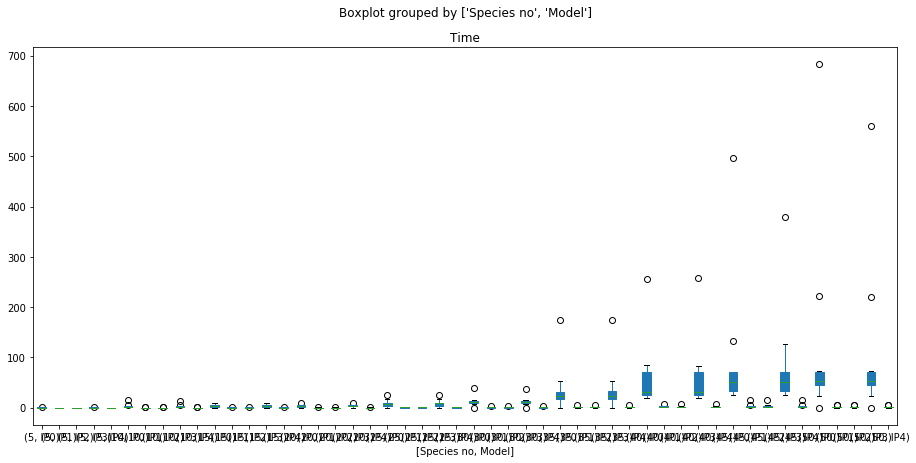

In [38]:
bp = dd.boxplot(column=['Time'], by=['Species no','Model'],grid=False,
                patch_artist = True, return_type='both',figsize=(15, 7))

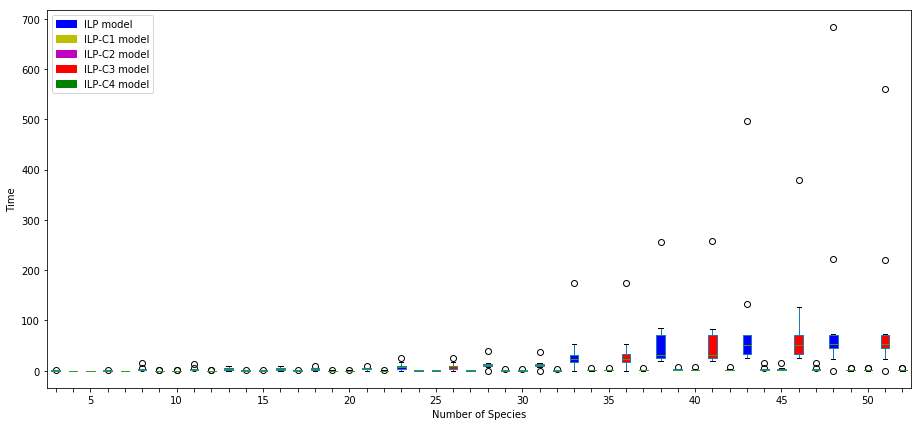

In [39]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

bp = dd.boxplot(column=['Time'], by=['Species no','Model'],grid=False,
                patch_artist = True, return_type='both',figsize=(15, 7))

colors = ['b', 'y', 'm', 'r', 'g' ]
for row_key, (ax,row) in bp.iteritems():
    ax.set_xlabel('Number of Species')
    ax.set_ylabel('Time')
    ax.set_title('')
    labels = [item.get_text() for item in ax.get_xticklabels()]
    for i in range(len(labels)):
        labels[i] = ''
    lista = [(2,5),(7,10),(12,15),(17,20),(22,25),
            (27,30),(32,35),(37,40),(42,45),(47,50)]
    for a,b in lista:
        labels[a] = str(b)    
    ax.set_xticklabels(labels)
    for i,box in enumerate(row['boxes']):
        box.set_facecolor(colors[i % 5])
        
        
a_patch = mpatches.Patch(color='b', label='ILP model')
b_patch = mpatches.Patch(color='y', label='ILP-C1 model')
c_patch = mpatches.Patch(color='m', label='ILP-C2 model')
d_patch = mpatches.Patch(color='r', label='ILP-C3 model')
e_patch = mpatches.Patch(color='g', label='ILP-C4 model')
plt.legend(loc='upper left',handles=[a_patch, b_patch,c_patch, d_patch,e_patch])
plt.suptitle("")
plt.rcParams.update({'font.size': 15})
plt.savefig('Fig.pdf')
plt.show()

**DataFrame metl**

In [40]:
import seaborn as sns

# merging columns
dd_a = dd.loc[dd['Model'] == "IP0"]
dd_a = dd_a[['Time','Species no','Exp id']]
dd_a = dd_a.rename(columns={'Time': 'M0'})

dd_b = dd.loc[dd['Model'] == "IP3"]
dd_b = dd_b[['Time','Species no','Exp id']]
dd_b = dd_b.rename(columns={'Time': 'M3'})

ddf = dd_a.merge(dd_b, on='Exp id')
ddf = ddf[['M0','Species no_x','M3']]
ddf = ddf.rename(columns={'Species no_x': 'Species no'})

# main command
dfl = ddf.melt(id_vars=['Species no'], value_vars=['M0', 'M3'])

plt.figure(figsize=(12,8))
bp = sns.boxplot(x='Species no', y='value', data=dfl, showfliers=False, 
                 color='tomato', hue='variable')
bp.set(xlabel='Number of Species', ylabel='Time (seconds)')
plt.legend(title='Model', loc='upper left')  #, labels=['M0', 'M3'] to set labels


plt.rcParams.update({'font.size': 22})
plt.savefig('Fig03.eps')

plt.show()
